#  Semana 6: Teorema del Límite Central 

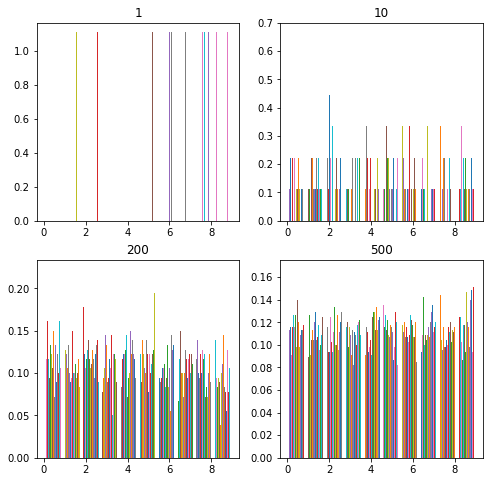

In [1]:
import numpy
import matplotlib.pyplot as plt

#Seleccionamos varios tamaño para la muestra
num = [1, 10, 200, 500] 
# list conteniendo las medias
means = [] 

# A continuación se generan 1, 10, 200, 500 números aleatorios entre 0 y 10
# Calculamos su media.
    
# Usamos la función seed de manera que cada vez que se ejecute el bucle
# obtengamos el mismo resultado.
for j in num:
	numpy.random.seed(20)
	x = [
		numpy.random.randint(
			0, 10, j) for _i in range(1000)]
	means.append(x)
k = 0

# Dibujamos las cuatro figuras.
fig, ax = plt.subplots(2, 2, figsize =(8, 8))
for i in range(0, 2):
	for j in range(0, 2):
		# Histogram for each x stored in means
		ax[i, j].hist(means[k], 10, density = True)
		ax[i, j].set_title(label = num[k])
		k = k + 1
plt.show()


In [2]:
#Fuente: https://www.geeksforgeeks.org/python-central-limit-theorem/

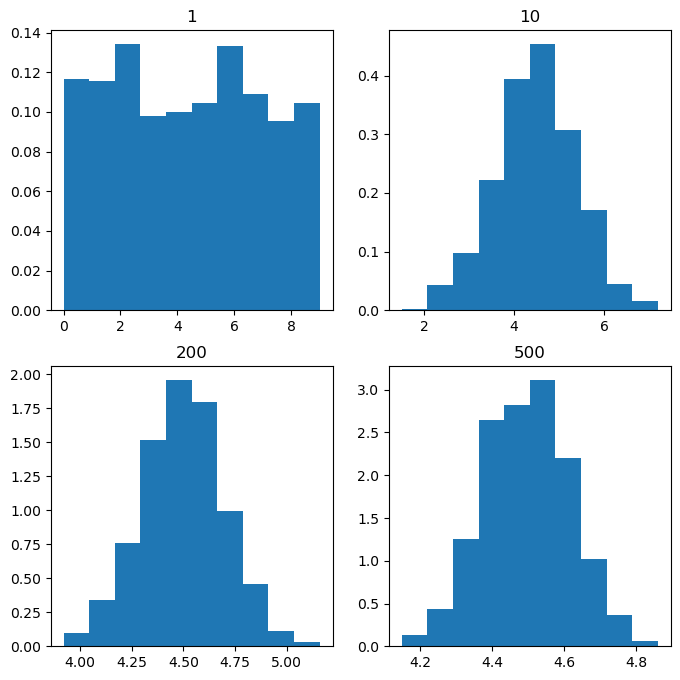

In [8]:
import numpy
import matplotlib.pyplot as plt

#Seleccionamos varios tamaño para la muestra
num = [1, 10, 200, 500] 
# list of sample means
means = [] 

# A continuación se generan 1, 10, 200, 500 números aleatorios entre 0 y 10
# Calculamos su media.
    
# Usamos la función seed de manera que cada vez que se ejecute el bucle
# obtengamos el mismo resultado.
for j in num:
	numpy.random.seed(20)
	x = [numpy.mean(
		numpy.random.randint(
			0, 10, j)) for _i in range(1000)]
	means.append(x)
k = 0

# Dibujamos las cuatro figuras.
fig, ax = plt.subplots(2, 2, figsize =(8, 8))
for i in range(0, 2):
	for j in range(0, 2):
		# Histogram for each x stored in means
		ax[i, j].hist(means[k], 10, density = True)
		ax[i, j].set_title(label = num[k])
		k = k + 1
plt.show()


## Teorema del Límite Central
Para una muestra aleatoria de tamaño 𝒏 de una población con media 𝝁 y desviación estándar 𝛔,  la distribución  de la media muestral $\bar{𝒙}$  tiene una media aproximadamente  igual a la media de la población 𝝁 y una desviación estándar igual a la desviación estándar de la población dividida por la raíz cuadrada del tamaño de la muestra, es decir, 

$$\frac{\sigma}{\sqrt{n}}$$

### Interpretación del TLC
Cuando se eligen muestras de un tamaño específico de una población, la distribución de las medias de estas muestras tiende a seguir una distribución normal. Esta aproximación se vuelve más precisa a medida que aumenta el tamaño de las muestras.



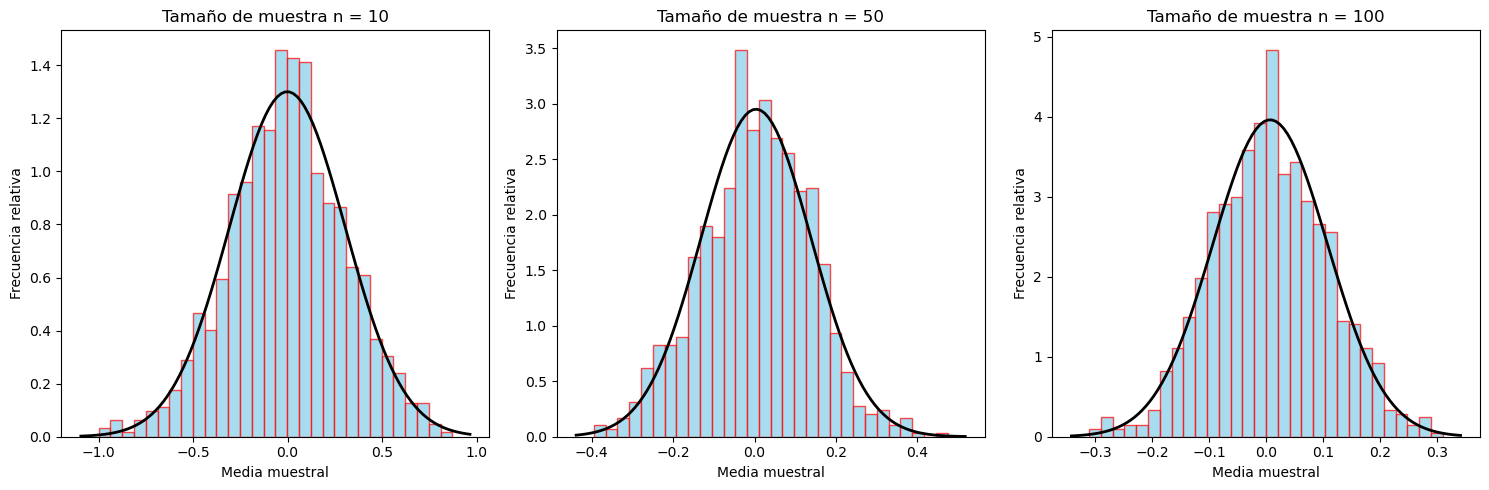

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Definir la población (puedes cambiar la distribución según tus necesidades)
poblacion = np.random.normal(loc=0, scale=1, size=100000)

# Función para generar muestras y calcular la media
def generar_muestras(tamano_muestra):
    medias_muestrales = [np.mean(np.random.choice(poblacion, size=tamano_muestra)) for _ in range(1000)]
    return medias_muestrales

# Tamaños de muestra
tamanos_muestra = [10, 50, 100]

# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Generar gráficos para diferentes tamaños de muestra
for i, n in enumerate(tamanos_muestra):
    medias_muestrales = generar_muestras(n)
    axs[i].hist(medias_muestrales, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='red')
    
    # Añadir la curva de la distribución gaussiana
    xmin, xmax = axs[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, np.mean(medias_muestrales), np.std(medias_muestrales))
    axs[i].plot(x, p, 'k', linewidth=2)
    
    axs[i].set_title(f'Tamaño de muestra n = {n}')
    axs[i].set_xlabel('Media muestral')
    axs[i].set_ylabel('Frecuencia relativa')

plt.tight_layout()
plt.show()


### Ejemplo:

Validaremos el teorema del límite central utilizando una base de datos real.

Consideremos la base de datos Used Cars Dataset (un conjunto de datos que contiene anuncios de automóviles con numerosas características categóricas y numéricas). En particular,  nos enfocaremos en la variable aleatoria usd_price.  A continuación se detallan los pasos a seguir: 

**Paso 1:** Escojamos inicialmente como n=5 el tamaño de la muestra aleatoria de la variable price_usd. 

**Paso 2:** Realizaremos 1000 muestras aleatorias con un tamaño de muestra de 5 de la columna price_usd y calcularemos el promedio de cada muestra.

**Paso 3:** : Usaremos la biblioteca Matplotlib para generar un histograma que ilustre la distribución de los 1000 promedios de muestras de tamaño 5, estableciendo el parámetro bins en 30. 

Verificaremos que la distribución de las medias de estas muestras tiende a seguir una distribución normal. Esta aproximación se volverá más precisa a medida que aumentemos el tamaño de las muestras, por lo que repetiremos el cálculo tomando muestras de tamaño 10 y 30. 

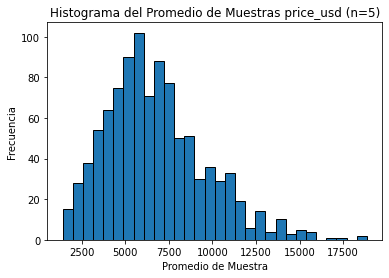

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)
 

# Cargamos la base de datos cars.csv, previamente guardada en la carpeta de trabajo:
#https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data
archivo_csv = 'cars.csv'

# Lee el archivo CSV
data_frame = pd.read_csv(archivo_csv)

# Columna que deseamos leer
nombre_columna = 'price_usd'

# Accedemos a la columna específica
columna_seleccionada = data_frame[nombre_columna]

# Reemplaza 'tamaño_muestra' con el tamaño deseado para cada muestra
tamaño_muestra = 5

# Creamos las 1000 muestras aleatorias, cada una de tamaño tamaño_muestra, de la columna price_usd
muestras = [columna_seleccionada.sample(tamaño_muestra) for _ in range(1000)]

# Calcula el promedio de cada muestra
promedios = [muestra.mean() for muestra in muestras]

# Crea un histograma del promedio de las muestras
plt.hist(promedios, bins=30, edgecolor='black')  # Puedes ajustar el número de bins con otros valores
plt.title(f'Histograma del Promedio de Muestras price_usd (n={tamaño_muestra})')
plt.xlabel('Promedio de Muestra' )
plt.ylabel('Frecuencia')
plt.show()



